In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


In [74]:
df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

Diccionario de Datos:

Pregnancies: Número de embarazos.
Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa.
BloodPressure: Presión arterial diastólica (mm Hg).
SkinThickness: Espesor del pliegue cutáneo del tríceps (mm).
Insulin: Niveles séricos de insulina a las 2 horas (mu U/ml).
BMI: Índice de masa corporal (peso en kg / (altura en m)^2).
DiabetesPedigreeFunction: Función de pedigrí de diabetes.
Age: Edad (años).
Outcome: Variable objetivo (1: diabetes, 0: no diabetes).

In [75]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [76]:
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [77]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [78]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())

In [79]:

scaler = MinMaxScaler()
df[['Glucose', 'BloodPressure', 'BMI', 'Age']] = scaler.fit_transform(df[['Glucose', 'BloodPressure', 'BMI', 'Age']])


In [80]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.607510,0.566438,20.536458,79.799479,0.476790,0.471876,0.204015,0.348958
std,3.369578,0.160666,0.158654,15.952218,115.244002,0.117499,0.331329,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000,0.000000
25%,1.000000,0.497487,0.508197,0.000000,0.000000,0.406855,0.243750,0.050000,0.000000
50%,3.000000,0.587940,0.590164,23.000000,30.500000,0.476900,0.372500,0.133333,0.000000
75%,6.000000,0.704774,0.655738,32.000000,127.250000,0.545455,0.626250,0.333333,1.000000
max,17.000000,1.000000,1.000000,99.000000,846.000000,1.000000,2.420000,1.000000,1.000000


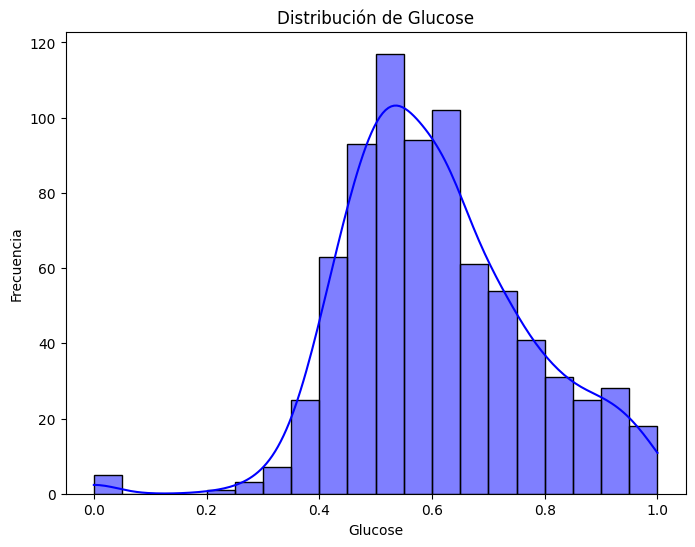

C:\Users\feded\AppData\Local\Temp\ipykernel_6676\3283213483.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


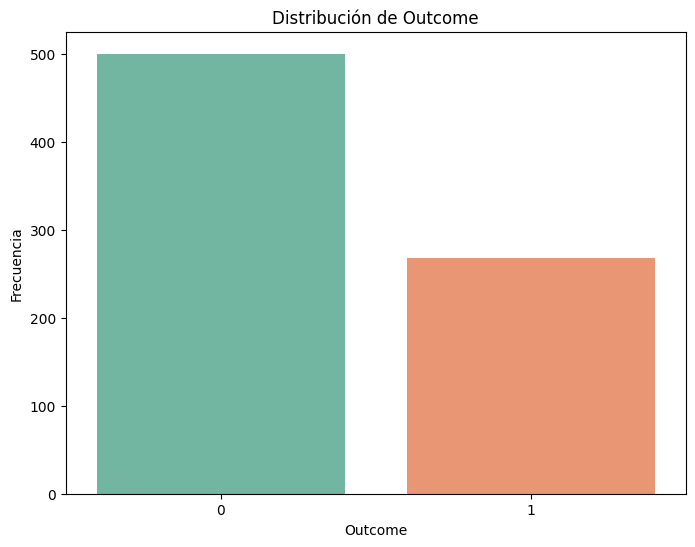

In [81]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Glucose'], kde=True, bins=20, color='blue')
plt.title('Distribución de Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frecuencia')
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title('Distribución de Outcome')
plt.xlabel('Outcome')
plt.ylabel('Frecuencia')
plt.show()



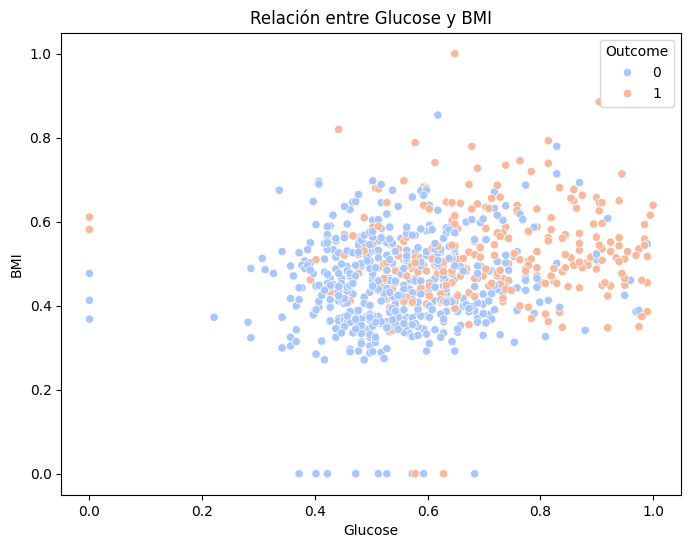

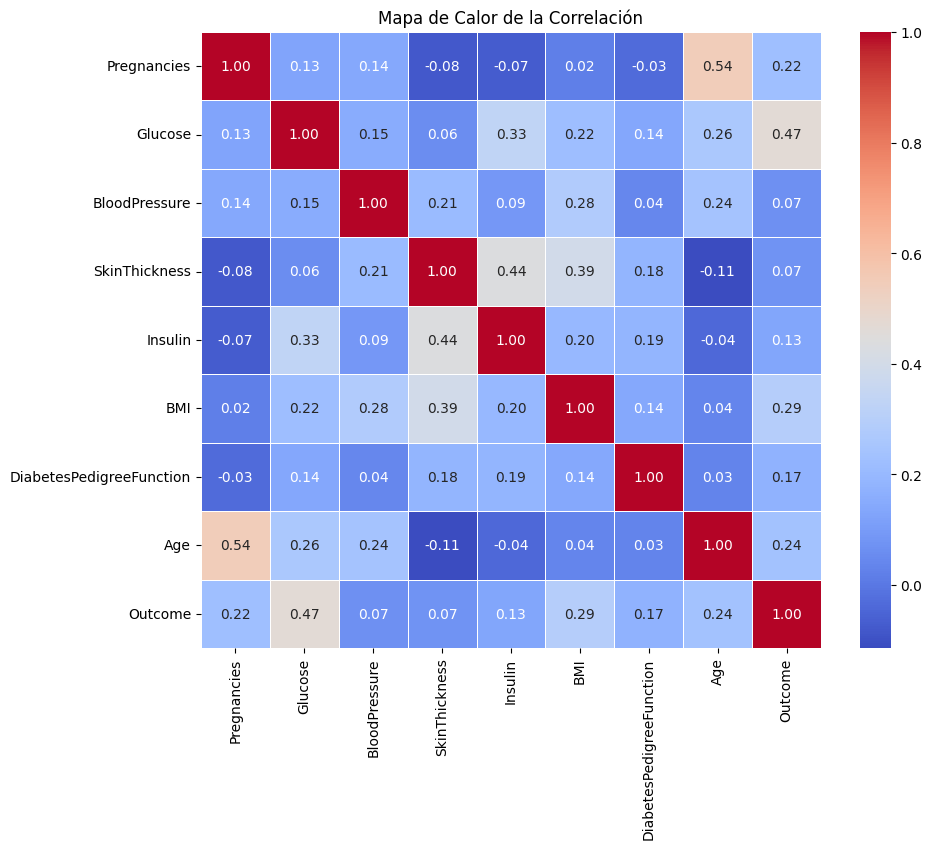

In [82]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='BMI', data=df, hue='Outcome', palette='coolwarm')
plt.title('Relación entre Glucose y BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

matriz = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de la Correlación')
plt.show()

In [83]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_pred)

print("Random Forest Model:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"ROC-AUC: {rf_roc_auc:.4f}")

Random Forest Model:
Accuracy: 0.7662
Precision: 0.6727
Recall: 0.6727
F1-Score: 0.6727
ROC-AUC: 0.7455


In [85]:
xgb_model = xgb.XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_pred)

print("XGBoost Model:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1-Score: {xgb_f1:.4f}")
print(f"ROC-AUC: {xgb_roc_auc:.4f}")


XGBoost Model:
Accuracy: 0.7338
Precision: 0.6167
Recall: 0.6727
F1-Score: 0.6435
ROC-AUC: 0.7202


In [86]:
print("\nComparación de modelos:")
print(f"Random Forest vs XGBoost")
print(f"excatitud: {rf_accuracy:.4f} vs {xgb_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f} vs {xgb_precision:.4f}")



Comparación de modelos:
Random Forest vs XGBoost
excatitud: 0.7662 vs 0.7338
Precision: 0.6727 vs 0.6167


Podemos ver que no hay mucha diferencia entre los modelos pero a mi criterio el random forest es mas conveniente
por la precision y exactitud